### Binary Traffic Sign Classification

This is our first notebook on neural networks. We will start by building a simple neural network that will help us to classify two types of traffic signs. The signs used in this lesson are a processed subset from the famous German Traffic Sign Recognition Database (GTSRB) that can be downloaded [here]().

In [35]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]
np.random.seed(42)


#### Data Loading

Let's now load the data to see what we are dealing with.

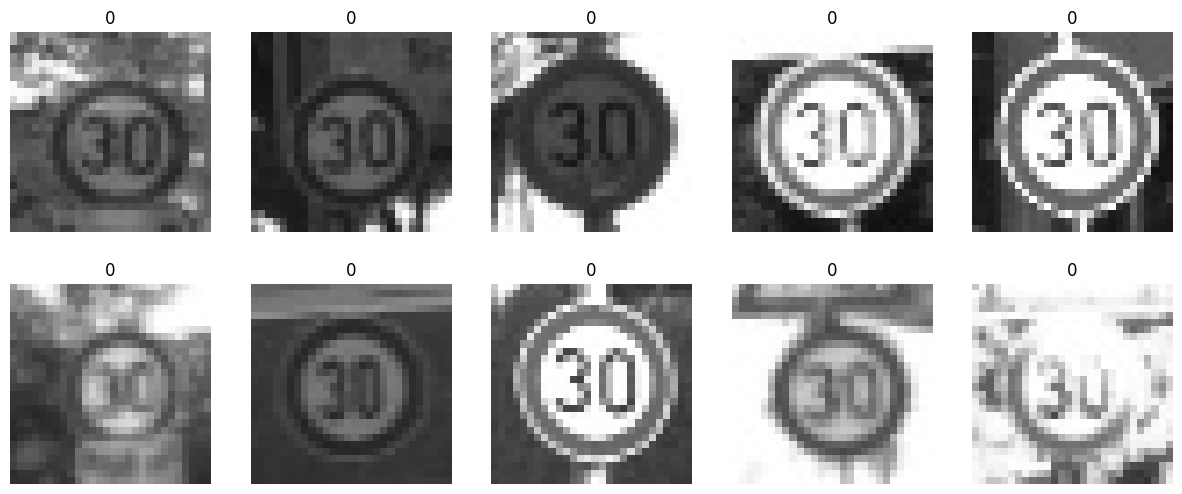

In [36]:
folder = '../data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

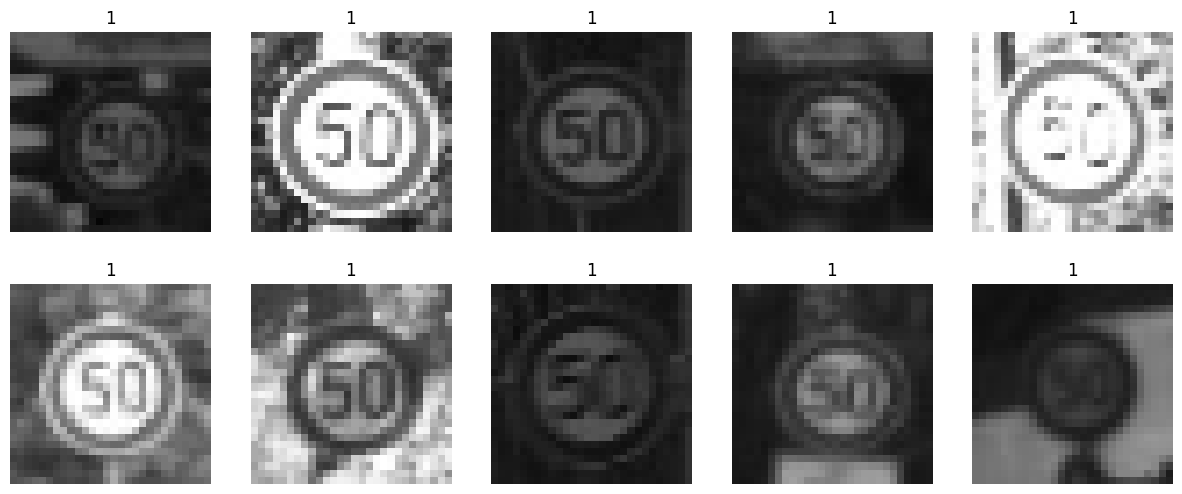

In [37]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [38]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


**None: looks like the whole task of the classifier will be to find and distinguish '3' from '5'**  
Images are mostly well centered and normalized to one size. Classes are well balanced having 2220 and 2250 examples.

#### Prepare Input Data

To train our neural network model, we have to prepare the data to the format the the model actually expects. In our case, this will be numpy arrays.

In [39]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


But now we have a problem. We cannot just feed the image to a neuron since the neuron inputs are flat (one dimensional). On the other hand, the images are 2D matrices. Therefore, we need to "flatten" the images to a one dimensional vector of pixels.

In [40]:
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)
    
pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 1.2934651374816895


Or, you know, just let make use of our friend numpy :-)

In [41]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.033049821853637695


Before the training, let's again have a look at some raqndom samples from our dataset.

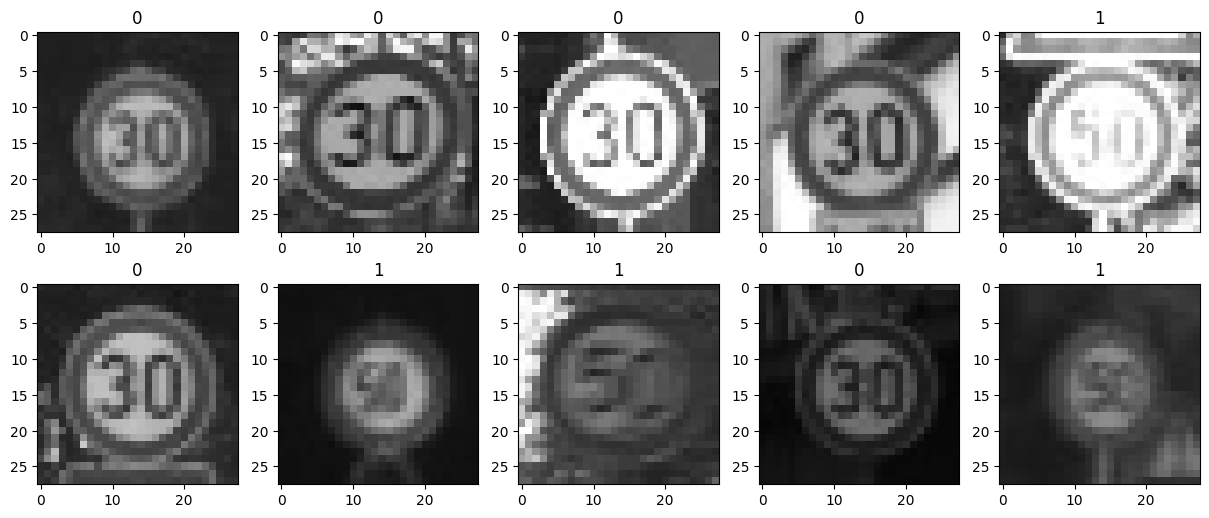

In [42]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

#### Building the Neural Network

Let's now build our first (and yes, very simple) neural network using Tensorflow. For that, we will need a couple of new imports.

In [43]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, Conv2D, Flatten

The following netowork will consist of only one single neuron. It is a very tiny network (not even a network, strictly speaking :-) ) and yet it can be quite powerful.

In [44]:
inputs = Input(shape=(pixels.shape[1]))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 1)                 785       
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [45]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Before starting the training, we have to compile the model. During the compilation, we indicate what optimizer we want to use and what loss should be applied for the minimization process.

In [46]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

And let's train :-)

In [47]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10


140/140 [==============================] - 1s 4ms/step - loss: 0.2865
Epoch 2/10
140/140 [==============================] - 1s 4ms/step - loss: 0.2216
Epoch 3/10
140/140 [==============================] - 1s 4ms/step - loss: 0.1803
Epoch 4/10
140/140 [==============================] - 1s 4ms/step - loss: 0.1583
Epoch 5/10
140/140 [==============================] - 1s 4ms/step - loss: 0.1356
Epoch 6/10
140/140 [==============================] - 1s 4ms/step - loss: 0.1264
Epoch 7/10
140/140 [==============================] - 1s 4ms/step - loss: 0.1208
Epoch 8/10
140/140 [==============================] - 1s 4ms/step - loss: 0.1112
Epoch 9/10
140/140 [==============================] - 1s 5ms/step - loss: 0.1074
Epoch 10/10
140/140 [==============================] - 1s 4ms/step - loss: 0.1005


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

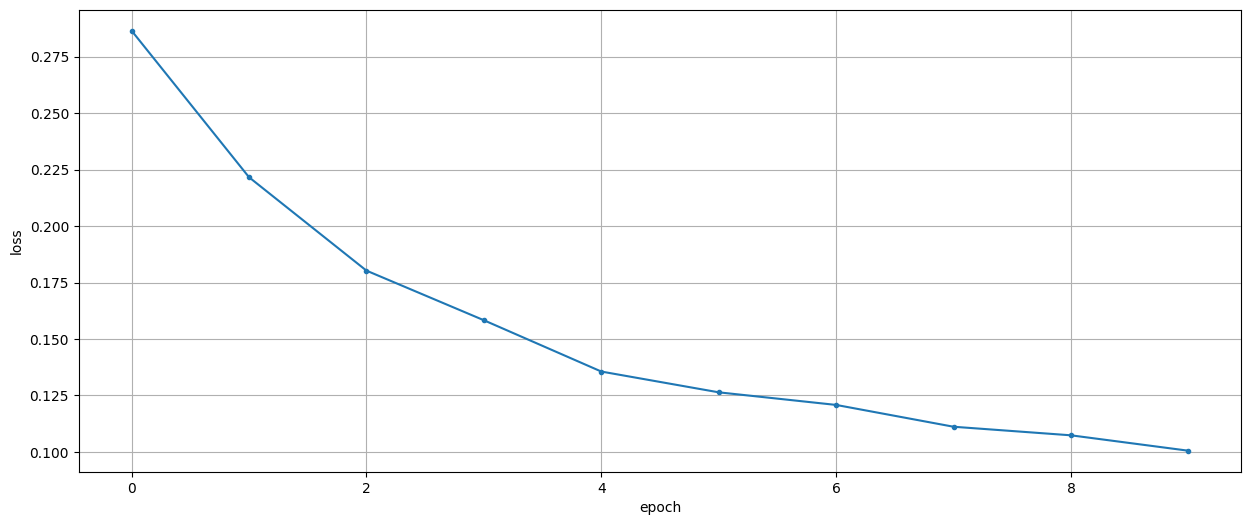

In [48]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.40264603] [0.40264603]


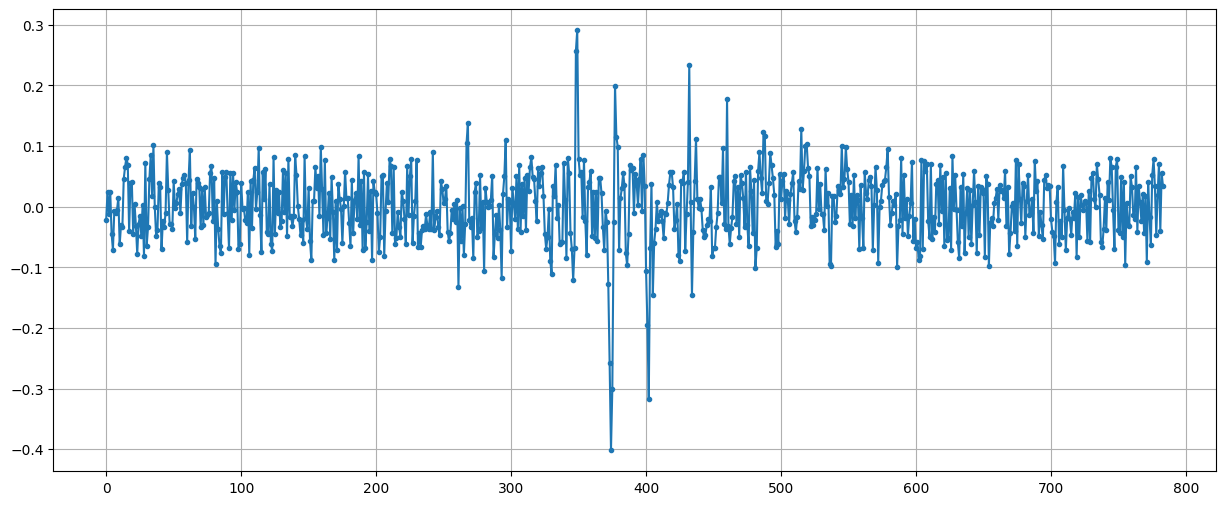

In [49]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

#### Performance Evaluation

Once our model is trained, we will can run it on our images to see how it performs (inference).

In [50]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 [==============================] - 0s 77ms/step
[[0.575596]] 1


In [51]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 [==============================] - 0s 2ms/step


In [52]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9156599552572707


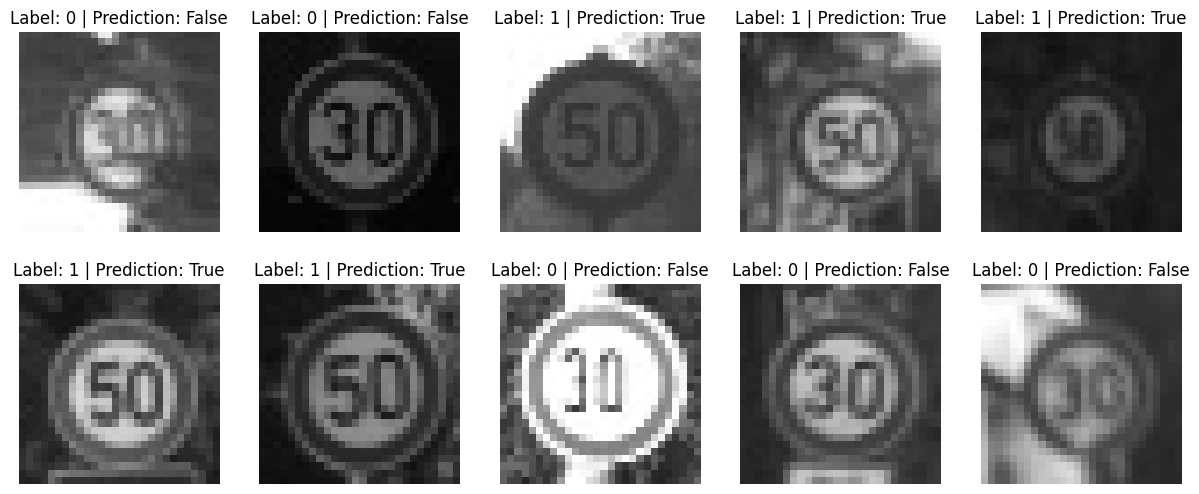

In [53]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

**Baseline accuracy: 0.9156**
1. I'm going to make the network wider and deeper and train it for the same time for comparison. Will use non-linear activations and replace loss function.
2. I will add some convolution.
3. I will try to use histogram equalization as preprocessing.

In [54]:
inputs = Input(shape=(pixels.shape[1]))
outputs1 = Dense(100, activation="relu")(inputs)
outputs2 = Dense(100, activation="relu")(outputs1)
outputs = Dense(1, activation="sigmoid")(outputs2)
model = Model(inputs, outputs)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 


Total params: 88,701
Trainable params: 88,701
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])

history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10


140/140 [==============================] - 2s 7ms/step - loss: 0.6152 - accuracy: 0.6588
Epoch 2/10
140/140 [==============================] - 1s 7ms/step - loss: 0.4196 - accuracy: 0.8302
Epoch 3/10
140/140 [==============================] - 1s 7ms/step - loss: 0.3102 - accuracy: 0.8823
Epoch 4/10
140/140 [==============================] - 1s 7ms/step - loss: 0.2450 - accuracy: 0.9130
Epoch 5/10
140/140 [==============================] - 1s 7ms/step - loss: 0.2065 - accuracy: 0.9262
Epoch 6/10
140/140 [==============================] - 1s 7ms/step - loss: 0.2388 - accuracy: 0.9103
Epoch 7/10
140/140 [==============================] - 1s 7ms/step - loss: 0.1610 - accuracy: 0.9436
Epoch 8/10
140/140 [==============================] - 1s 6ms/step - loss: 0.1622 - accuracy: 0.9407
Epoch 9/10
140/140 [==============================] - 1s 6ms/step - loss: 0.1646 - accuracy: 0.9430
Epoch 10/10
140/140 [==============================] - 1s 7ms/step - loss: 0.2284 - accuracy: 0.9190


In [56]:
np.max(history.history['accuracy'])

0.9436241388320923

**I'd start to track overfitting here, but not today :)**  
Approach 1 accuracy: 0.9436

In [57]:
images = images[..., np.newaxis]

In [58]:
inputs = Input(shape=(images.shape[1:]))
outputs1 = Conv2D(32, 3, strides=(1,1), padding='valid', activation='relu')(inputs)
outputs2 = Flatten()(outputs1)
outputs3 = Dense(100, activation="relu")(outputs2)
outputs = Dense(1, activation="sigmoid")(outputs3)
model2 = Model(inputs, outputs)

model2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_1 (Flatten)         (None, 21632)             0         
                                                                 
 dense_10 (Dense)            (None, 100)               2163300   
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,163,721
Trainable params: 2,163,721
Non-trainable params: 0
_________________________________________________________________


In [59]:
model2.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])

history = model2.fit(images, labels, epochs=10, batch_size=32)

Epoch 1/10


140/140 [==============================] - 2s 11ms/step - loss: 13.3876 - accuracy: 0.7774
Epoch 2/10
140/140 [==============================] - 1s 10ms/step - loss: 0.3909 - accuracy: 0.9277
Epoch 3/10
140/140 [==============================] - 1s 10ms/step - loss: 0.2240 - accuracy: 0.9544
Epoch 4/10
140/140 [==============================] - 1s 10ms/step - loss: 0.1317 - accuracy: 0.9682
Epoch 5/10
140/140 [==============================] - 1s 11ms/step - loss: 0.1116 - accuracy: 0.9740
Epoch 6/10
140/140 [==============================] - 1s 10ms/step - loss: 0.0671 - accuracy: 0.9812
Epoch 7/10
140/140 [==============================] - 1s 10ms/step - loss: 0.0433 - accuracy: 0.9881
Epoch 8/10
140/140 [==============================] - 1s 10ms/step - loss: 0.0216 - accuracy: 0.9933
Epoch 9/10
140/140 [==============================] - 1s 9ms/step - loss: 0.0224 - accuracy: 0.9926
Epoch 10/10
140/140 [==============================] - 1s 10ms/step - loss: 0.0596 - accuracy: 0.9828


In [60]:
np.max(history.history['accuracy'])

0.9932885766029358

**loss jumped at 10th epoch, so again, probably overfit**  
Approach 2 accuracy: 0.9932

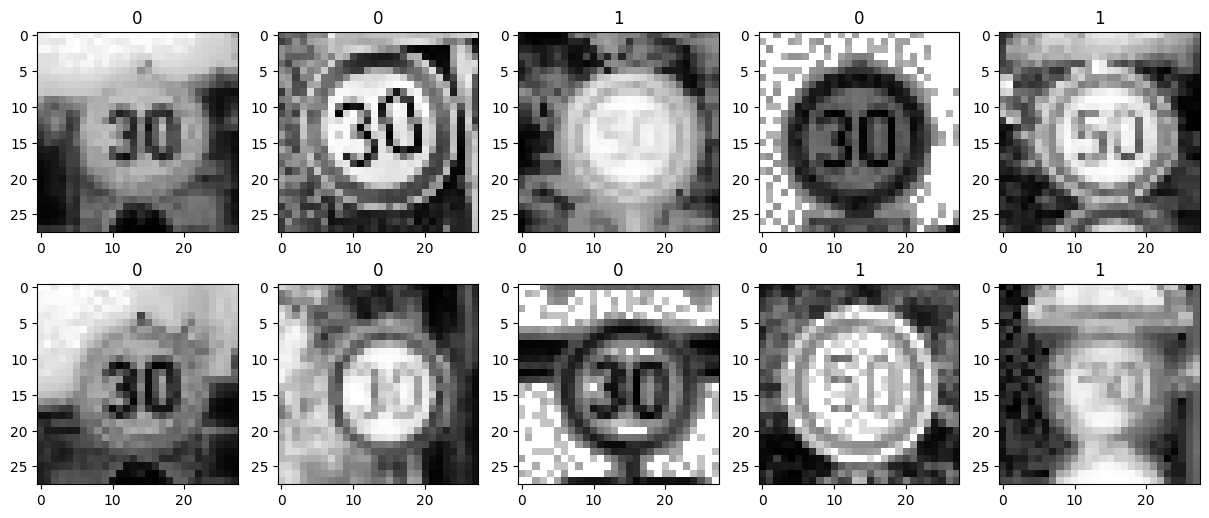

In [61]:
# HISTOGRAM EQUALIZATION
images = np.squeeze(images)
images = np.array([cv2.equalizeHist(x) for x in images])

for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [62]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.03144073486328125


In [63]:
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])

history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 [==============================] - 2s 9ms/step - loss: 0.1726 - accuracy: 0.9322
Epoch 2/10
140/140 [==============================] - 1s 8ms/step - loss: 0.1207 - accuracy: 0.9541
Epoch 3/10
140/140 [==============================] - 1s 8ms/step - loss: 0.1182 - accuracy: 0.9528
Epoch 4/10
140/140 [==============================] - 1s 7ms/step - loss: 0.1196 - accuracy: 0.9492
Epoch 5/10
140/140 [==============================] - 1s 8ms/step - loss: 0.0907 - accuracy: 0.9640
Epoch 6/10
140/140 [==============================] - 1s 6ms/step - loss: 0.1059 - accuracy: 0.9593
Epoch 7/10
140/140 [==============================] - 1s 8ms/step - loss: 0.0902 - accuracy: 0.9667
Epoch 8/10
140/140 [==============================] - 1s 7ms/step - loss: 0.0842 - accuracy: 0.9660
Epoch 9/10
140/140 [==============================] - 1s 7ms/step - loss: 0.0637 - accuracy: 0.9763
Epoch 10/10
140/140 [==============================] - 1s 7ms/step - loss: 0.0806 - accuracy: 0.9691

In [64]:
np.max(history.history['accuracy'])

0.9762863516807556

**About 2/10 epochs faster learning after histogram equalization**  
Approach 1 accuracy: 0.9436  
After histogram equalization: 0.9762

In [65]:
images = images[..., np.newaxis]

In [66]:
model2.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])

history = model2.fit(images, labels, epochs=10, batch_size=32)

Epoch 1/10


140/140 [==============================] - 2s 12ms/step - loss: 0.3831 - accuracy: 0.9443
Epoch 2/10
140/140 [==============================] - 1s 10ms/step - loss: 0.0427 - accuracy: 0.9857
Epoch 3/10
140/140 [==============================] - 2s 12ms/step - loss: 0.0127 - accuracy: 0.9964
Epoch 4/10
140/140 [==============================] - 2s 11ms/step - loss: 0.0052 - accuracy: 0.9996
Epoch 5/10
140/140 [==============================] - 2s 12ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 6/10
140/140 [==============================] - 2s 12ms/step - loss: 9.3529e-04 - accuracy: 1.0000
Epoch 7/10
140/140 [==============================] - 2s 13ms/step - loss: 6.1228e-04 - accuracy: 1.0000
Epoch 8/10
140/140 [==============================] - 2s 16ms/step - loss: 4.5870e-04 - accuracy: 1.0000
Epoch 9/10
140/140 [==============================] - 2s 14ms/step - loss: 3.7165e-04 - accuracy: 1.0000
Epoch 10/10
140/140 [==============================] - 3s 18ms/step - loss: 2.6815e-04

In [67]:
np.max(history.history['accuracy'])

1.0

**OOPS... Well, histogram equalization makes training significantly faster even for convolutional network. And now it's totally overfit, which means that we should use a smaller network and apply generalization.**  
Approach 2 accuracy: 0.9932  
After histogram equalization: 1.0